# K-means bank marketing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/bank-full.csv')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


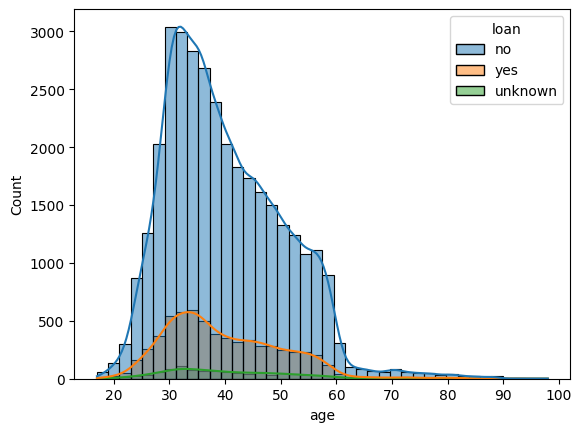

In [10]:
sns.histplot(data=df, x='age', bins=40, kde = True, hue= 'loan')
plt.show()

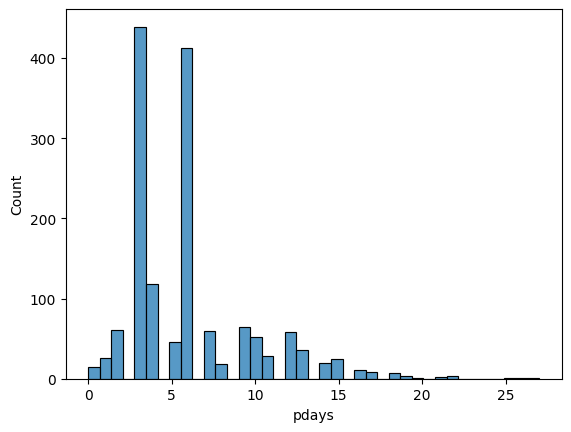

In [14]:
sns.histplot(data=df[df['pdays']!=999], x='pdays')
plt.show()

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [16]:
df.contact.unique()

array(['telephone', 'cellular'], dtype=object)

In [18]:
df.duration/60

0        4.350000
1        2.483333
2        3.766667
3        2.516667
4        5.116667
           ...   
41183    5.566667
41184    6.383333
41185    3.150000
41186    7.366667
41187    3.983333
Name: duration, Length: 41188, dtype: float64

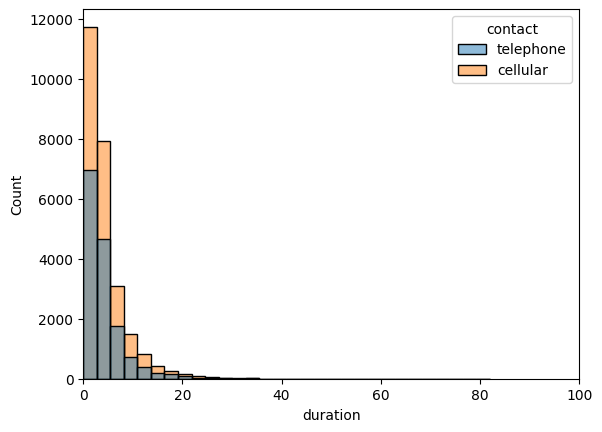

In [29]:
dur = df.duration/60
con = df.contact
sns.histplot(x=dur, bins = 30, hue= con)
plt.xlim(0, 100)
plt.show()

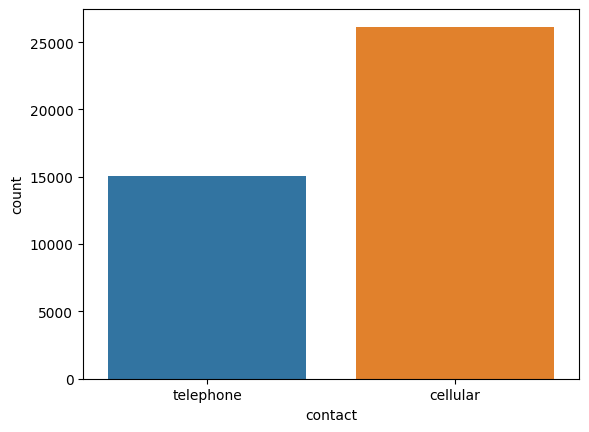

In [31]:
sns.countplot(data=df, x= 'contact', hue='contact')
plt.show()

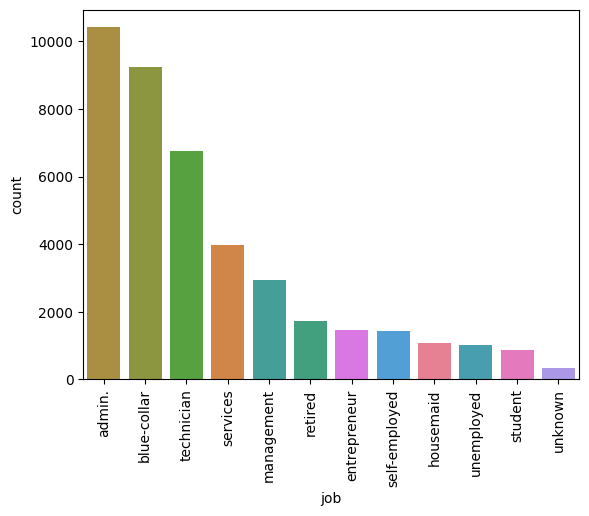

In [34]:
sns.countplot(data=df, x='job', hue='job', order= df.job.value_counts().index)
plt.xticks(rotation=90)
plt.show()

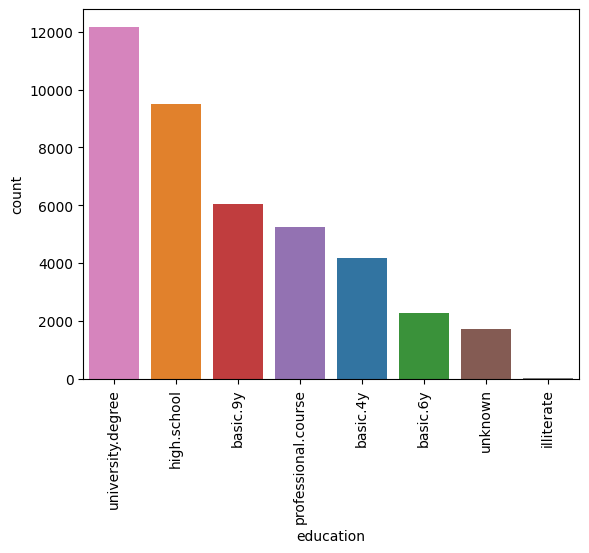

In [35]:
sns.countplot(data=df, x='education', hue='education', order= df.education.value_counts().index)
plt.xticks(rotation=90)
plt.show()

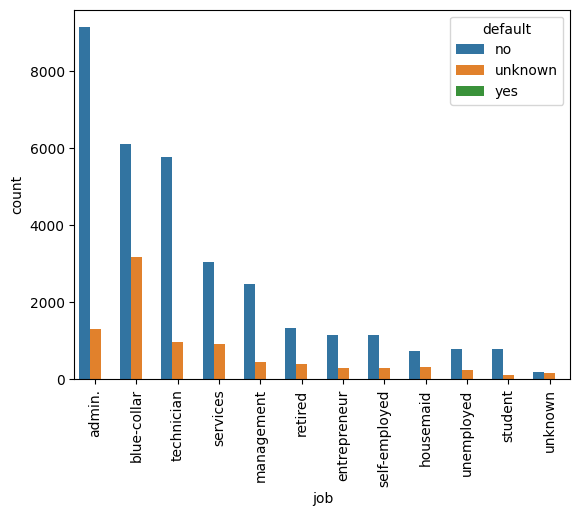

In [37]:
sns.countplot(data=df, x='job', hue='default', order= df.job.value_counts().index)
plt.xticks(rotation=90)
plt.show()

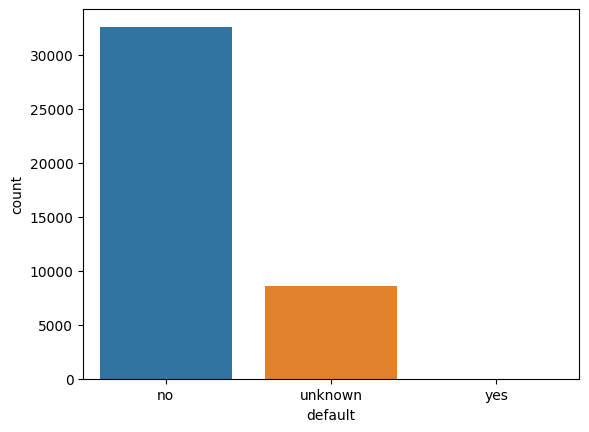

In [39]:
sns.countplot(data=df, x='default', hue='default');

In [40]:
df.default.value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [41]:
df.loan.value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [ ]:
sns.pairplot(df)

In [42]:
X = pd.get_dummies(df)

In [43]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,False,True
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,True,False
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,True,False
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,False,True


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
scaled_X = scaler.fit_transform(X)

In [48]:
print(scaled_X)

[[ 1.53303429  0.01047142 -0.56592197 ... -0.1857      0.35630932
  -0.35630932]
 [ 1.62899323 -0.42150051 -0.56592197 ... -0.1857      0.35630932
  -0.35630932]
 [-0.29018564 -0.12451981 -0.56592197 ... -0.1857      0.35630932
  -0.35630932]
 ...
 [ 1.53303429 -0.26722482 -0.20490853 ... -0.1857      0.35630932
  -0.35630932]
 [ 0.38152696  0.70856893 -0.56592197 ... -0.1857     -2.80655022
   2.80655022]
 [ 3.26029527 -0.07438021  0.15610492 ... -0.1857      0.35630932
  -0.35630932]]


In [49]:
from sklearn.cluster import KMeans

In [50]:
model = KMeans(n_clusters = 2)

In [51]:
cluster_labels = model.fit_predict(scaled_X)

In [56]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0], shape=(41188,), dtype=int32)

In [57]:
X['Cluster'] = cluster_labels

In [58]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,False,False,False,True,False,False,True,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,False,False,False,True,False,True,False,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,False,False,False,True,False,True,False,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,False,False,False,True,False,False,True,0


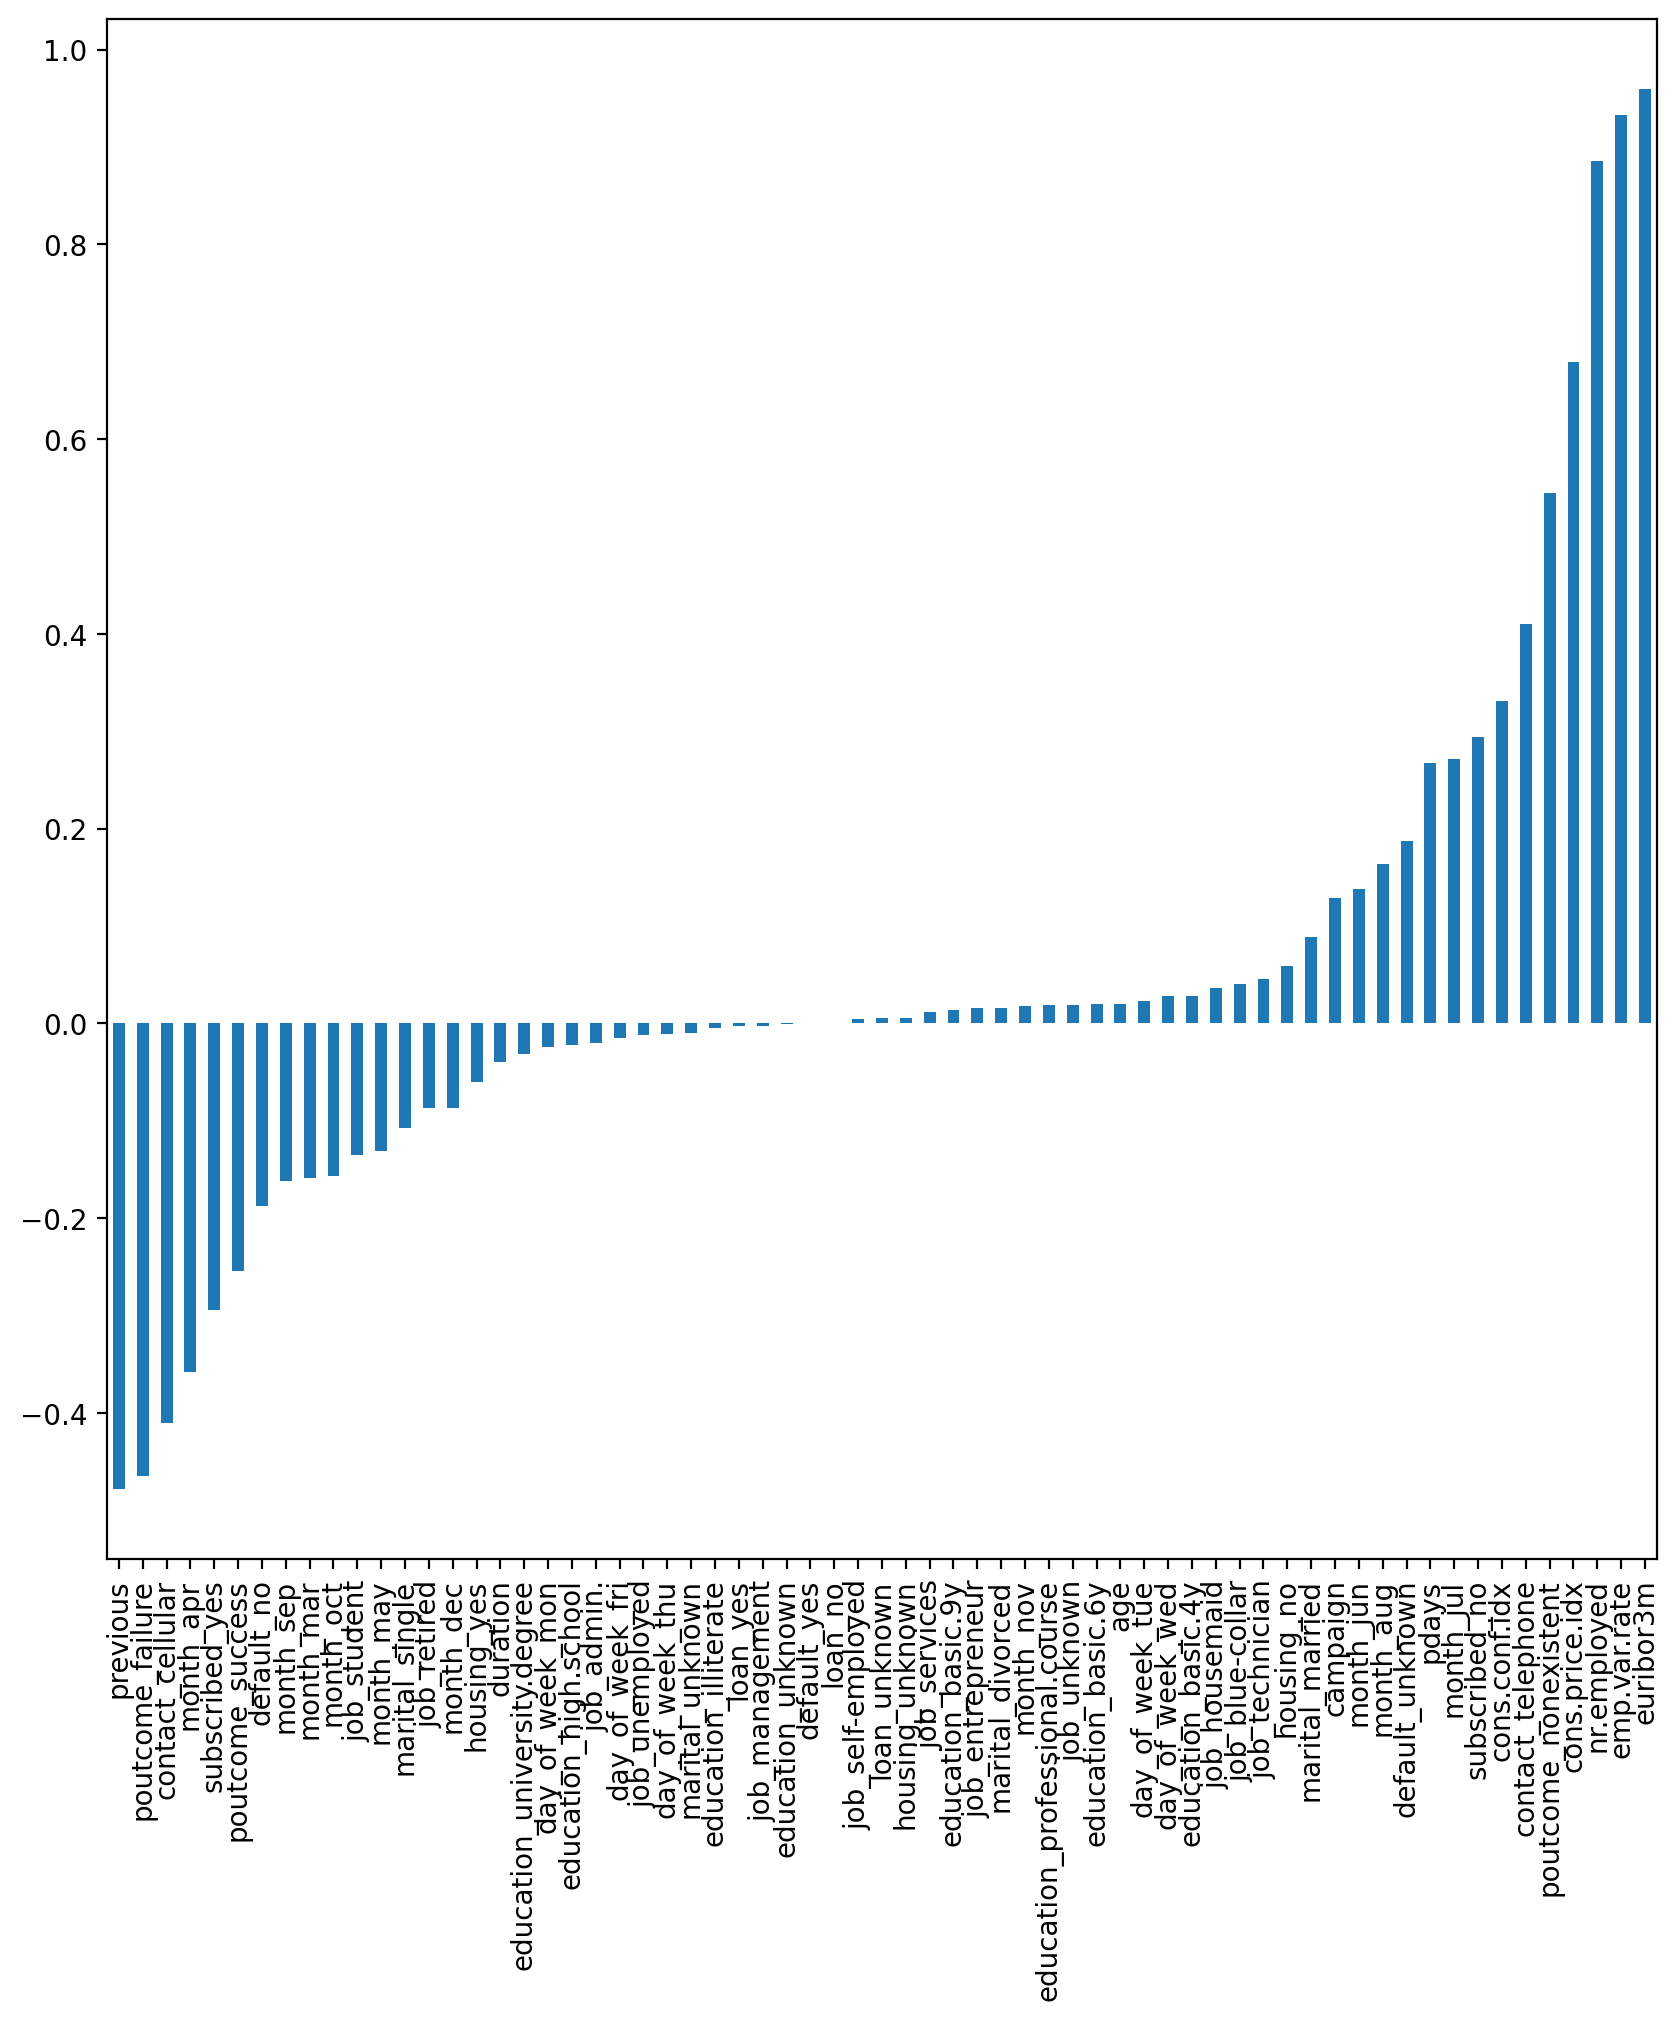

In [65]:
plt.figure(figsize=(10, 10), dpi = 200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar');

In [69]:
model2 = KMeans(n_clusters=3)
model2.fit(scaled_X)

KMeans(n_clusters=3)

In [72]:
model2.inertia_

2370787.179100714

In [85]:
ssd=[]
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)

    ssd.append(model.inertia_)

In [86]:
ssd

[2469792.4571073237,
 2389495.186836198,
 2292017.543639604,
 2247421.236129728,
 2237072.1433755998,
 2151410.187362272,
 2086391.1185629764,
 2016018.1274253158]

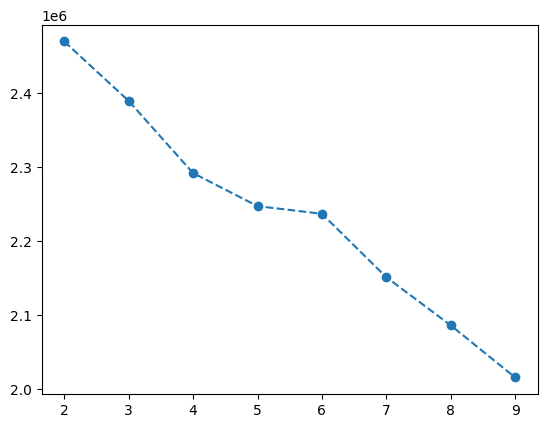

In [87]:
plt.plot(range(2, 10), ssd, 'o--');

In [88]:
ssd_series = pd.Series(ssd)

In [89]:
ssd_series.diff()

0             NaN
1   -80297.270271
2   -97477.643197
3   -44596.307510
4   -10349.092754
5   -85661.956013
6   -65019.068799
7   -70372.991138
dtype: float64